# 1. Load data and observation

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
from sklearn.metrics import r2_score

In [410]:
# Load data tập train
df_train = pd.read_csv('https://cs.uit.edu.vn/data2.txt', sep=",", header=None)
df_train.columns = ["x", "y"]

In [411]:
# Load data tập test
df_test1 = pd.read_csv('https://cs.uit.edu.vn/data3.txt', sep=",", header=None)
df_test1.columns = ["x", "y"]
df_test2 = pd.read_csv('https://cs.uit.edu.vn/data4.txt', sep=",", header=None)
df_test2.columns = ["x", "y"]

In [412]:
df_train.head(2)

,x,y
0,6083695,0.521842
1,1954367,0.152648


In [413]:
df_train.describe()

,x,y
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


In [414]:
df_test1.describe()

,x,y
count,1.059000e+04,10590.000000
mean,2.999277e+07,2.642812
std,5.759381e+06,0.537305
min,2.000026e+07,1.669640
25%,2.503806e+07,2.180550
50%,2.994436e+07,2.639820
75%,3.500845e+07,3.100155
max,3.999734e+07,4.287660


In [415]:
df_test2.describe()

,x,y
count,6.023000e+03,6023.000000
mean,6.001134e+07,5.510494
std,5.788140e+06,0.571520
min,5.000951e+07,4.395220
25%,5.501938e+07,5.019585
50%,5.992788e+07,5.495210
75%,6.506852e+07,6.002910
max,6.999990e+07,7.615200


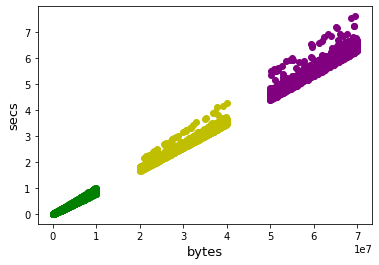

In [416]:
plt.scatter(df_train.x, df_train.y, color = 'g')
plt.scatter(df_test1.x, df_test1.y, color = 'y')
plt.scatter(df_test2.x, df_test2.y, color = 'purple')
plt.title("")
plt.xlabel('bytes', fontsize = 13)
plt.ylabel('secs', fontsize = 13);

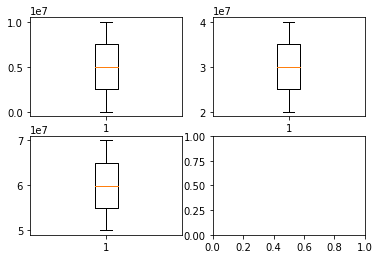

In [417]:
figure, axis = plt.subplots(2, 2)
axis[0][0].boxplot(df_train['x'])
axis[0][1].boxplot(df_test1['x'])
axis[1][0].boxplot(df_test2['x']);

In [418]:
# training set
kind_train = np.full(shape=df_train.shape[0],
                fill_value=1,
                dtype=np.int
                )
df_train['kind'] = kind_train

# testset 1
kind_test1 = np.full(shape=df_test1.shape[0],
                fill_value=2,
                dtype=np.int
                )
df_test1['kind'] = kind_test1

# testset 2
kind_test2 = np.full(shape=df_test2.shape[0],
                fill_value=3,
                dtype=np.int
                )
df_test2['kind'] = kind_test2

In [419]:
frames = [df_train, df_test1, df_test2]

In [420]:
result = df_train.append([df_test1, df_test2], sort=True)

In [421]:
result.shape

(87728, 3)

In [422]:
size = df_train.shape[0] + df_test1.shape[0] + df_test2.shape[0]
index = np.arange(0, size)
result.index = index

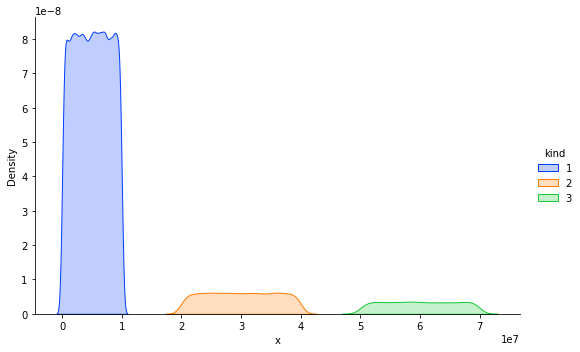

In [423]:
sns.displot(data=result, x='x', hue='kind', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

Nhận xét về data: 

1. Data tập train, test1, test2 phân phối đều.
2. Giá trị của x quá lớn so với giá trị y. Gấp ~ $\frac{mean(xtrain)}{mean(train)} = 1,2.10^7$.
3. Giá trị của x, y trong 3 tập khác nhau tương đối rõ. Ví dụ $0 <= x_{train} <= 1$ trong khi đó $5 <= x_{test2} <= 7$.
4. Độ lệch chuẩn tập train($2,8.e^6$) nhỏ hơn so với tập test1 ($5,7.e^6$), test2($5,7.e^6$) trong khi đó số lượng phần tử của tập train(71115) lại lớn hơn tập test(10590 + 6023 = 16613) -> rất có khả năng tập train chưa đủ đa dạng, dễ làm cho model bị overfit.
4. Data có vẻ có quan hệ tuyến tính. Đương thẳng dự đoán gần như song song với Ox.

Hướng giải quyết đầu tiên: 
1. Dùng model linear regresion để dự đoán mô hình. Đánh giá kết quả thông qua R_square Score và MSE

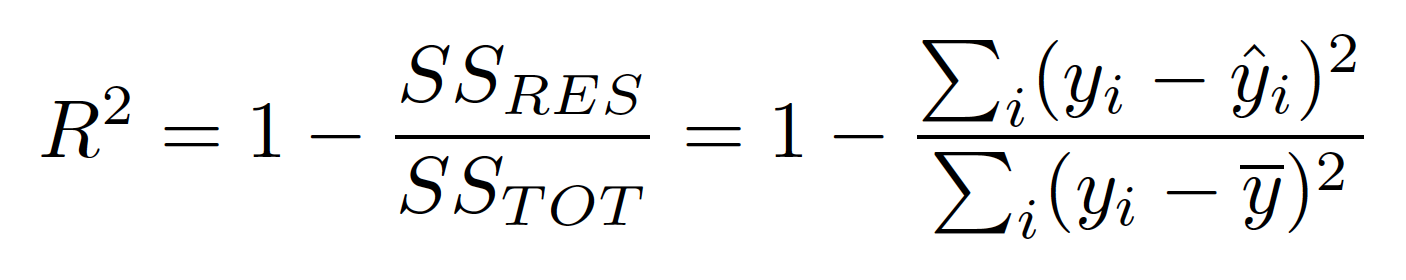

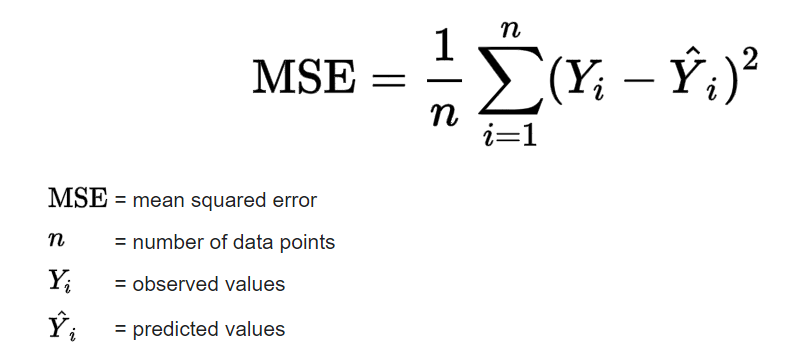

# 2. Train model

In [424]:
from sklearn.linear_model import LinearRegression

In [425]:
model = LinearRegression()

In [426]:
Xtrain, Ytrain = np.array(df_train.x).reshape(-1, 1), np.array(df_train.y).reshape(-1, 1)

In [427]:
model.fit(Xtrain, Ytrain)

LinearRegression()

In [428]:
print('w_0 = ', model.coef_)
print('w_1 = ', model.intercept_)

w_0 =  [[8.45569856e-08]]
w_1 =  [-0.01589553]


Đúng như dự đoán ban đầu, đường thẳng tạo ra sẽ gần như song song ox, cụ thể, sloop của đường thẳng là 8.4e-8

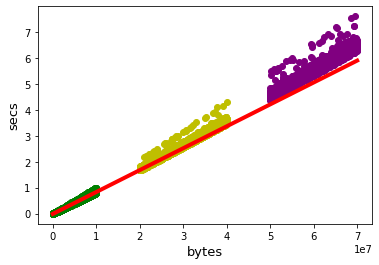

In [429]:
plt.scatter(df_train.x, df_train.y, color = 'g')
plt.scatter(df_test1.x, df_test1.y, color = 'y')
plt.scatter(df_test2.x, df_test2.y, color = 'purple')
X = [[0], [70000000]]
Y = model.predict(X)
plt.plot(X, Y, color = 'r', linewidth=4)
plt.title("")
plt.xlabel('bytes', fontsize = 13)
plt.ylabel('secs', fontsize = 13);

* Trông có vẻ model mình fit chưa predict tốt trên tập test, cái đường thẳng dự đoán hơi bị chệch ra khỏi tập test.
* Hãy dùng số liệu để đánh giá độ chính xác của mô hình, nhìn bằng mắt đôi khi chúng ta bị đánh lừa.

# 3. Predict model

In [430]:
Xtest1, Ytest1 = np.array(df_test1.x).reshape(-1, 1), np.array(df_test1.y).reshape(-1, 1)
Xtest2, Ytest2 = np.array(df_test2.x).reshape(-1, 1), np.array(df_test2.y).reshape(-1, 1)

In [431]:
Ypre1 = model.predict(Xtest1)
Ypre2 = model.predict(Xtest2)

In [432]:
print('Predict on test1: ', r2_score(Ytest1, Ypre1))
print('Predict on test2: ', r2_score(Ytest2, Ypre2))

Predict on test1:  0.9284132208349453
Predict on test2:  0.3156839605365861


Đối với test2, độ chính xác quá thấp, nó không thể đáp ứng dc kì vọng dự đoán của chúng ta. Bây giờ ta tìm cách cải thiện model.

# Cải tiến model

## Phương pháp 1: Xóa bớt data nhỏ

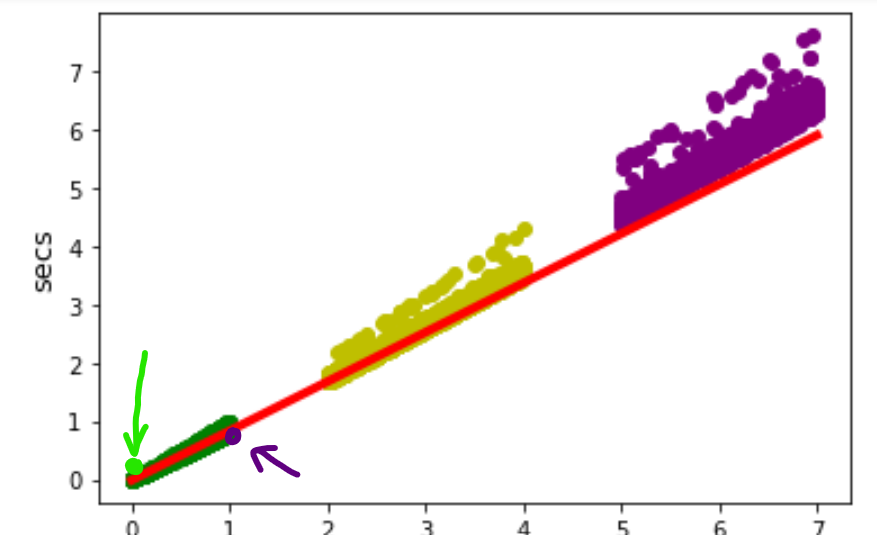

1. Với việc nhìn bằng mắt thường, có thể suy đoán 2 điểm màu xanh lá và màu tím là nơi có mật độ data rất nhiều, chúng tạo ra momen quay làm cho đường thẳng vô tình quay theo chiều kim đồng hồ, chệch đi so với tập test. 
2. Với hơn nữa, tập test của chúng ta là dự đoán giá trị lớn hơn tất cả các giá trị có trong tập train, nên tập train có dữ liệu nhỏ sẽ khó mà tổng quát được dữ liệu trong tập test và thực tế.

Với những vấn đề như thế, hướng giải quyết tiếp theo là xóa bớt data train đi. Việc xóa bao nhiêu data cũng là một bài toán hack não. Xóa ít quá thì nó không giảm được sự ảnh hưởng của data giá trị nhỏ, xóa nhiều quá thì còn ít dữ liệu, có thể mất tính tổng quát của model. Vì thế chúng ta sẽ test ở nhiều ngưỡng, sau đó chọn cái phù hợp nhất. Những ý tưởng vừa đưa ra có thể không đúng, nhưng việc của ta là thử, để cuối cùng đạt đươc kết quả tốt nhất.

In [433]:
def full_model(Xtrain, Ytrain, Xtest1, Ytest1, Xtest2, Ytest2):
  model = LinearRegression()
  model.fit(Xtrain, Ytrain)
  y_pre1 = model.predict(Xtest1)
  y_pre2 = model.predict(Xtest2)
  return r2_score(Ytest1, y_pre1), r2_score(Ytest2, y_pre2)

In [434]:
avg_value = np.mean(df_train.x)
threshold = np.arange(10, 200, 2)/100

In [435]:
def find_threshold(df_train, df_test1, df_test2):
  result_r2 = []
  for i in threshold: 
    df_train_temp = df_train[df_train.x >= i * avg_value]
    Xtrain, Ytrain = np.array(df_train_temp.x).reshape(-1, 1), np.array(df_train_temp.y).reshape(-1, 1)
    Xtest1, Ytest1 = np.array(df_test1.x).reshape(-1, 1), np.array(df_test1.y).reshape(-1, 1)
    Xtest2, Ytest2 = np.array(df_test2.x).reshape(-1, 1), np.array(df_test2.y).reshape(-1, 1)
    test1_Score, test2_Score = full_model(Xtrain, Ytrain, Xtest1, Ytest1, Xtest2, Ytest2)
    result_r2.append([test1_Score, test2_Score, i, int(df_train_temp.shape[0]/ df_train.shape[0]* 100)])
  return result_r2

In [436]:
Predict_threshold = np.array(find_threshold(df_train, df_test1, df_test2))

In [437]:
Predict_threshold

array([[ 0.93715133,  0.37712332,  0.1       , 94.        ],
       [ 0.93851391,  0.38689875,  0.12      , 93.        ],
       [ 0.93992895,  0.39711297,  0.14      , 92.        ],
       [ 0.94122581,  0.40653223,  0.16      , 91.        ],
       [ 0.94247543,  0.41566353,  0.18      , 90.        ],
       [ 0.94368549,  0.42455931,  0.2       , 89.        ],
       [ 0.94472321,  0.43223223,  0.22      , 89.        ],
       [ 0.94576219,  0.43995708,  0.24      , 88.        ],
       [ 0.94684313,  0.44804052,  0.26      , 87.        ],
       [ 0.94777582,  0.45505503,  0.28      , 86.        ],
       [ 0.94881673,  0.46292843,  0.3       , 85.        ],
       [ 0.94969715,  0.46962643,  0.32      , 84.        ],
       [ 0.9506804 ,  0.47715005,  0.34      , 83.        ],
       [ 0.95153373,  0.48371769,  0.36      , 82.        ],
       [ 0.95236595,  0.49015874,  0.38      , 81.        ],
       [ 0.95324345,  0.49698959,  0.4       , 80.        ],
       [ 0.95403234,  0.

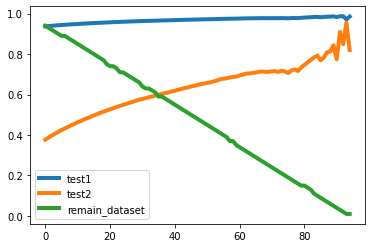

In [438]:
x_pivot = np.arange(Predict_threshold.shape[0])
plt.plot(x_pivot, Predict_threshold[:, 0], label = 'test1', linewidth=4)
plt.plot(x_pivot, Predict_threshold[:, 1], label = 'test2', linewidth=4)
plt.plot(x_pivot, Predict_threshold[:, 3]/100, label = 'remain_dataset', linewidth=4)
plt.legend()

In [439]:
print("Delete small value:")
print('Max r2_Score in test1: ', Predict_threshold[np.argmax(Predict_threshold[:, 0]), :])
print('Max r2_Score in test2: ', Predict_threshold[np.argmax(Predict_threshold[:, 1]), :])

Delete small value:
Max r2_Score in test1:  [0.9870059  0.90947529 1.92       3.        ]
Max r2_Score in test2:  [0.9717949  0.95466538 1.96       1.        ]


Nhận xét: 
1. Khi bỏ càng nhiều data có giá trị nhỏ, độ chính xác mô hình nhìn chung là tăng.
2. Độ đo r2 đạt giá trị max trên tập $test1$ và $test2$ thì tham số threshold mang giá trị $1.96 hoặc 0.92$. Nhưng để được độ chính xác tuyệt thế này thì phải đánh đổi một cái giá rất đắt, đó là data. Khi này data chúng ta còn chỉ ~1% so với dữ liệu gốc ban đầu. Một phép tính đơn giản, 1% của tập train $ = 0.01 * 71K = 710$ ảnh. Khi này, mô hình học 710 ảnh, nhưng cho dự đoán gần 16613 ảnh. Nếu bạn lạc quan cho là model này là "thần đồng, học 1 biết 10" thì cũng không cứu nỗi ca này đâu! Có chăng có thể lý giải cho tại sao r2_score cao trên tập test như sau:
* Mô hình đã bỏ bớt đi những giá trị nhỏ, Nếu bạn còn nhớ suy luận ở trên, chính những điểm giá trị nhỏ này có mật độ cao làm cho đường thẳng quay theo kim đồng hồ. Khi bị xóa bớt, ảnh hưởng của nó giảm, làm cho đường thẳng quay theo hướng ngược lại, vô tình đi qua các điểm trong tập test, làm cho giá trị lỗi giảm, r2_score tăng.
3. Tóm lại, bỏ bớt data có giá trị nhỏ sẽ làm cho mô hình này chính xác hơn, nhưng như phân tích ở trên thì việc bỏ càng nhiều càng làm mất tính tổng quát của mô hình. Nên chúng ta vẫn bỏ, nhưng sẽ tìm thêm hướng giải quyết khác trước khi áp dụng cách này.

In [440]:
df_test1.shape[0] + df_test2.shape[0]

16613

## Phương pháp 2: Dùng hàm phức tạp hơn để dự đoán

$y = w_1 x + w_2 x^2 + w_3 x ^ 3 + w_4 xlnx + w_5log_{2}x + w_6\sqrt{x} + w_7$

In [441]:
def convert(x):
  x = np.array(x).reshape(-1, 1)
  x2 = (x ** 2).reshape(-1, 1)
  x3 = (x ** 3).reshape(-1, 1)
  xlnx = (x * np.log(x)).reshape(-1, 1)
  log2 = (np.log(x)/ np.log(2)).reshape(-1, 1)
  sqrtx = (np.sqrt(x)).reshape(-1, 1)
  X = np.concatenate((x, x2, x3, xlnx, log2, sqrtx), axis = 1)
  return X

In [442]:
Xtrain = convert(df_train.x)

In [443]:
Xtest1 = convert(df_test1.x)
Xtest2 = convert(df_test2.x)

In [444]:
model_multiple = LinearRegression()
model_multiple.fit(Xtrain, df_train.y)

LinearRegression()

In [445]:
X_pivot = np.arange(1, max(df_test2.x), 70000)
X_convert = convert(X_pivot)
Y_pivot = model_multiple.predict(X_convert)

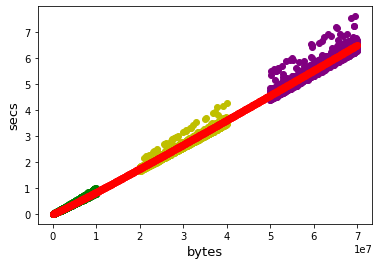

In [446]:
plt.scatter(df_train.x, df_train.y, color = 'g')
plt.scatter(df_test1.x, df_test1.y, color = 'y')
plt.scatter(df_test2.x, df_test2.y, color = 'purple')
plt.title("")
plt.xlabel('bytes', fontsize = 13)
plt.ylabel('secs', fontsize = 13)
plt.scatter(X_pivot, Y_pivot, color = 'r');

Trông có vẻ khả thi nhỉ!

In [447]:
Y_pre1 = model_multiple.predict(Xtest1)
Y_pre2 = model_multiple.predict(Xtest2)

In [448]:
print("Use model more complex:")
print('Predict on test1: ', r2_score(df_test1.y, Y_pre1))
print('Predict on test2: ', r2_score(df_test2.y, Y_pre2))

Use model more complex:
Predict on test1:  0.9851916927890714
Predict on test2:  0.9541022535881281


WoW, nếu dùng hàm trông có vẻ phức tạp ở trên thì kết quả cải thiện đáng kể đó, trong khi mình không cần xóa bớt tí dữ liệu nào. Vì thế mà mô hình có khả năng rất cao có được rule tổng quát của bài toán.

## Phương pháp 3: Kết hợp 2 phương pháp trên

Nếu kết hợp 2 phương pháp lại thì sao nhỉ? Thử và sai thôi.

In [449]:
def find_threshold_multiplemodel(df_train, df_test1, df_test2):
  result = []
  for i in threshold:
    df_train_temp = df_train[df_train.x > i * avg_value]
    Xtrain, Ytrain = convert(df_train_temp.x), df_train_temp.y
    Xtest1, Ytest1 = convert(df_test1.x), df_test1.y
    Xtest2, Ytest2 = convert(df_test2.x), df_test2.y
    Model_temp = LinearRegression().fit(Xtrain, Ytrain)
    Y_pre1 = Model_temp.predict(Xtest1)
    Y_pre2 = Model_temp.predict(Xtest2)
    result.append([r2_score(Ytest1, Y_pre1), r2_score(Ytest2, Y_pre2), i, int(df_train_temp.shape[0]/ df_train.shape[0] * 100)])
  return result

In [450]:
Predict_threshold_multiple = np.array(find_threshold_multiplemodel(df_train, df_test1, df_test2))

In [451]:
Predict_threshold_multiple

array([[ 9.85260294e-01,  9.54370584e-01,  1.00000000e-01,
         9.40000000e+01],
       [ 9.85090301e-01,  9.53624049e-01,  1.20000000e-01,
         9.30000000e+01],
       [ 9.84741488e-01,  9.51742442e-01,  1.40000000e-01,
         9.20000000e+01],
       [ 9.84264900e-01,  9.48519097e-01,  1.60000000e-01,
         9.10000000e+01],
       [ 9.83808443e-01,  9.44839554e-01,  1.80000000e-01,
         9.00000000e+01],
       [ 9.83786919e-01,  9.44654740e-01,  2.00000000e-01,
         8.90000000e+01],
       [ 9.83559437e-01,  9.42606908e-01,  2.20000000e-01,
         8.90000000e+01],
       [ 9.83488825e-01,  9.41946990e-01,  2.40000000e-01,
         8.80000000e+01],
       [ 9.82927352e-01,  9.36312246e-01,  2.60000000e-01,
         8.70000000e+01],
       [ 9.82653781e-01,  9.33352798e-01,  2.80000000e-01,
         8.60000000e+01],
       [ 9.82235794e-01,  9.28566655e-01,  3.00000000e-01,
         8.50000000e+01],
       [ 9.82332393e-01,  9.29702808e-01,  3.20000000e-01,
      

In [452]:
print('Combine 2 methods:')
print('Max r2_Score in test1: ', Predict_threshold_multiple[np.argmax(Predict_threshold_multiple[:, 0]), :])
print('Max r2_Score in test2: ', Predict_threshold_multiple[np.argmax(Predict_threshold_multiple[:, 1]), :])

Combine 2 methods:
Max r2_Score in test1:  [ 0.9878847   0.91961175  1.48       25.        ]
Max r2_Score in test2:  [ 0.98545108  0.95585151  1.22       39.        ]


Kết quả dự đoán của mô hình có cải thiện hơn so với dùng từng phương pháp riêng lẻ, nhưng sự cải thiện này tương đối nhỏ, gần như không có ý nghĩa gì với những data mà mô hình dự đoán trong tương lai.

Phải bỏ hơn phân nửa data để đổi về chưa tới 0.01 điểm trên tập test, một cuộc trao đổi quá chi là lỗ vốn. Thế nên mô hình cuối cùng team em chọn cho bài toán này là mô hình ở phương pháp 2.